

# Linerare Regression


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Datensatz erstellen
Datensatz mit N vielen Datenpunkten erstellen

```np.random.random(N)``` erstellt N viele zufällige Zahlen zwischen 0 und 1




In [2]:
N = 20

# zufällige Daten auf der x-Achse im Bereich (-5, +5)
X = np.random.random(N)*10 - 5

# Gerade mit etwas Rauschen 
Y = 0.5 * X - 1 + np.random.randn(N)

Visualisierung des Datensatzes

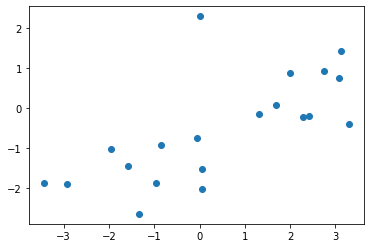

In [3]:
plt.scatter(X,Y)

## Preprocessing: Datensatz in richtige Form bringen

 Die notewendige Form ist eine Matrix der Form *(Anzahl_der_Datenpunkte x Anzahl_der_Dimensionen)*

 Die Daten befinden sich im Numpy-Typ float64. Pytorch nutzt float32, daher muss der Datentyp entsprechend konvertiert werden

In [4]:
# Daten in richtiges Format bringen
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# Daten in den richtigen Datentypen konvertieren
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

## Definieren des Modells


*   Modell
*   Fehlerfunktion (Lossfunction)
*   Optimizer



In [5]:
# Modell für lineare Regression
model = nn.Linear(1, 1)

# Fehlerfunktion 
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


## Trainieren des Modells


* ```n_epochs``` Anzahl der Epochen des Trainings
* ```losses = []``` Eine Liste, die die Werte der Fehlerfunktion speichert. Diese Werte werden im nachhinein geplottet, damit der Traininsprozess nachvollzogen werden kann.
* ```optimizer.zero_grad()``` Die Gradienten müssen zu Beginn jeden Durchlaufs auf 0 gesetzt werden, da Pytorch die Gradienten "anhäuft". Das Anhäufen ist wichtig bei RNNs 





In [8]:
n_epochs = 30
losses = []

for it in range(n_epochs):
  # Gradienten auf 0 setzen
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  
  # Zwischenspeichern des Fehlers (Vorhersage, wahre Werte)
  loss = criterion(outputs, targets)

  # Speichern des Fehlers in der Liste "losses"
  losses.append(loss.item())

  # Backward pass und optimieren
  loss.backward()
  optimizer.step()

  # Ausgabe die Trainingsschritte veranschaulicht
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item(): .4f}')

Epoch 1/30, Loss:  1.2583
Epoch 2/30, Loss:  0.8855
Epoch 3/30, Loss:  0.8784
Epoch 4/30, Loss:  0.8768
Epoch 5/30, Loss:  0.8758
Epoch 6/30, Loss:  0.8752
Epoch 7/30, Loss:  0.8747
Epoch 8/30, Loss:  0.8744
Epoch 9/30, Loss:  0.8742
Epoch 10/30, Loss:  0.8741
Epoch 11/30, Loss:  0.8740
Epoch 12/30, Loss:  0.8740
Epoch 13/30, Loss:  0.8740
Epoch 14/30, Loss:  0.8739
Epoch 15/30, Loss:  0.8739
Epoch 16/30, Loss:  0.8739
Epoch 17/30, Loss:  0.8739
Epoch 18/30, Loss:  0.8739
Epoch 19/30, Loss:  0.8739
Epoch 20/30, Loss:  0.8739
Epoch 21/30, Loss:  0.8739
Epoch 22/30, Loss:  0.8739
Epoch 23/30, Loss:  0.8739
Epoch 24/30, Loss:  0.8739
Epoch 25/30, Loss:  0.8739
Epoch 26/30, Loss:  0.8739
Epoch 27/30, Loss:  0.8739
Epoch 28/30, Loss:  0.8739
Epoch 29/30, Loss:  0.8739
Epoch 30/30, Loss:  0.8739


Plotten des Fehler während des Trainings

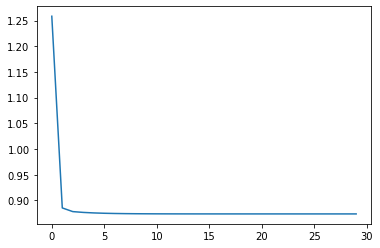

In [9]:
plt.plot(losses)

## Plotten der Vorhersage

```predicted``` gibt die Vorhersage des Modells an



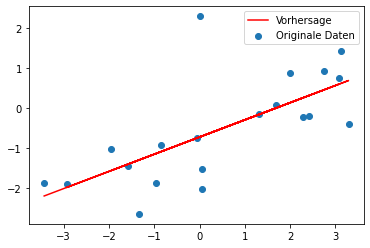

In [10]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Originale Daten')
plt.plot(X, predicted, label="Vorhersage", color="red")
plt.legend()
plt.show()

Anzeigen der Modellparameter nach dem Training. (Parameter der Geraden)
-> Die originalen Datensatzparameter für die Gerade waren **w = 0.5** und -1. (Festgelegt beim erstellen des Datensatzes)

In [11]:
# Gewichte und Bias
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.42927215]] [-0.7146484]
